# Configuring the coalescent
An introduction of how to configure the {class}`~phasegen.distributions.Coalescent` can be found in the {doc}`quickstart` guide. There are also separate sections focussing on configuring the {doc}`demography<demography>` and {doc}`how to obtain more complex moments<rewards>` using rewards. Here we focus on additional configuration options.

## Multiple-merger coalescents
Supported coalescent models are {class}`~phasegen.coalescent_models.StandardCoalescent`, {class}`~phasegen.coalescent_models.BetaCoalescent` and {class}`~phasegen.coalescent_models.DiracCoalescent`, and can be specified when constructing the {class}`~phasegen.distributions.Coalescent` distribution.

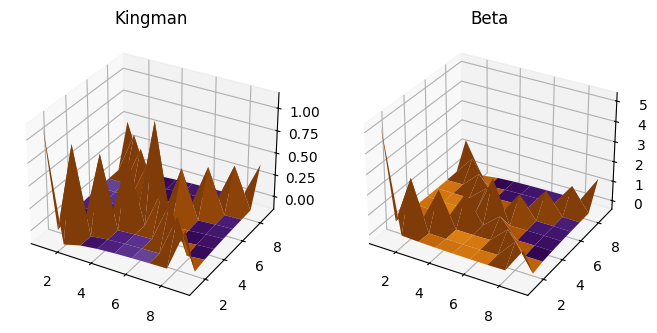

In [6]:
import phasegen as pg
from matplotlib import pyplot as plt

# compare 2-SFS of Kingman and Beta coalescents
kingman = pg.Coalescent(n=10, model=pg.StandardCoalescent())
beta = pg.Coalescent(n=10, model=pg.BetaCoalescent(alpha=1.5))

_, axs = plt.subplots(ncols=2, figsize=(8, 4), subplot_kw={"projection": "3d"})

# beta coalescent shows positive correlations between disparate minor allele frequencies
kingman.sfs.cov.plot_surface(ax=axs[0], show=False, title='Kingman')
beta.sfs.cov.plot_surface(ax=axs[1], title='Beta');

## Recombination
Recombination is currently restricted to 2 loci and not compatible with multiple-merger coalescents and summary statistics based on the SFS. If you think an extension to this would be useful, please open an issue on GitHub.

In [7]:
coal = pg.Coalescent(n=8, loci=pg.LocusConfig(recombination_rate=0.1, n=2))

# time to ultimate MRCA
coal.tree_height.mean

1.8352605047108952

In [8]:
# marginal tree height of first locus
coal.tree_height.loci[0].mean

1.7499999999999993

In [9]:
coal = pg.Coalescent(n=8, loci=pg.LocusConfig(recombination_rate=0.1, n=2, n_unlinked=8))

# time to ultimate MRCA starting with 8 unlinked lineages
coal.tree_height.mean

1.938321304233787